In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [8]:
def generate_noisy_line(length=10, num_points=100, noise_level=0.2):
    # x = np.linspace(0, length, num_points)
    # y = np.linspace(0, length, num_points)
    # y += np.random.normal(scale=noise_level, size=num_points)
    # return np.column_stack((x, y))
    # Generate base points
    x_base = np.linspace(0, length, num_points)
    y_base = np.linspace(0, length, num_points)

    # Add noise to base points
    y_base += np.random.normal(scale=noise_level, size=num_points)
    
    # Create a cubic spline interpolation of the noisy points
    cs = CubicSpline(x_base, y_base)
    
    # Generate smooth x values
    x_smooth = np.linspace(0, length, num_points * 10)
    
    # Generate smooth y values using the spline
    y_smooth = cs(x_smooth)
    
    return np.column_stack((x_smooth, y_smooth))

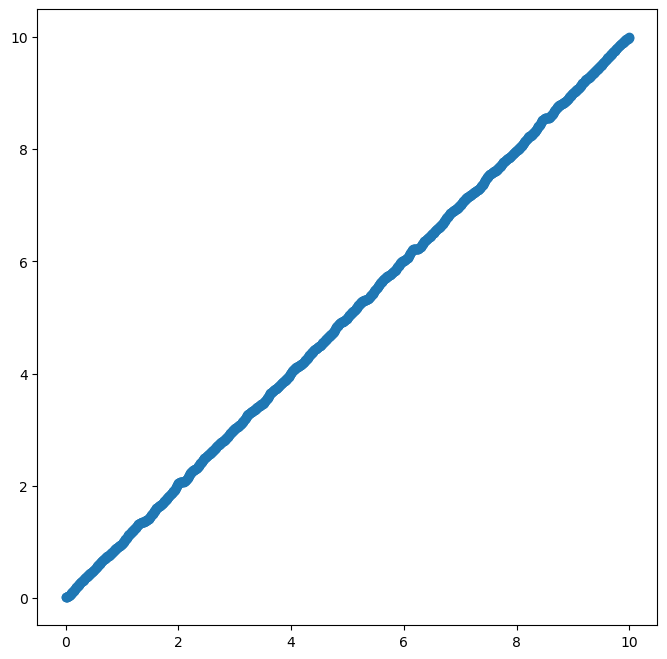

In [11]:
line_data = generate_noisy_line(10, 100, 0.02)
plt.figure(figsize=(8, 8))
plt.plot(line_data[:, 0], line_data[:, 1], 'o', label='Noisy Line')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Noisy Line Plot')
# plt.grid(True)
# plt.legend()
plt.show()

Line points have been saved to C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.csv


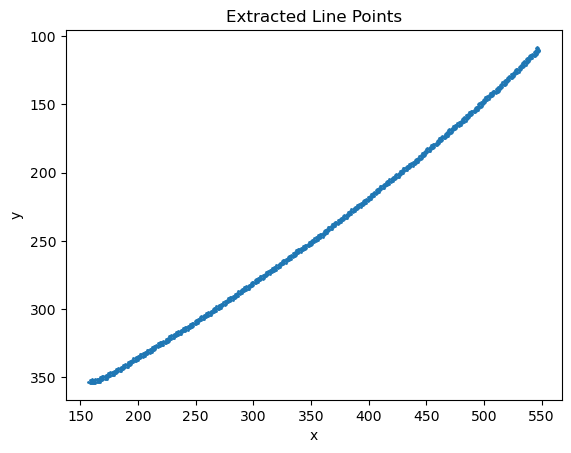

In [16]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt

def extract_line_points(image_path, csv_path='line_points.csv'):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded successfully
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Threshold the image to get a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find the coordinates of the white pixels (the line)
    coordinates = np.column_stack(np.where(binary_image > 0))
    
    # Save the coordinates to a CSV file
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['x', 'y'])  # Header
        for coord in coordinates:
            writer.writerow(coord.tolist())
    
    print(f"Line points have been saved to {csv_path}")
    
    return coordinates

# Example usage
image_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.png"
csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line1.csv"  # Change this to your desired CSV output path
line_points = extract_line_points(image_path, csv_path)

# Visualize the points
plt.scatter(line_points[:, 1], line_points[:, 0], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Extracted Line Points')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.show()


Line points have been saved to C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\curved_line.csv


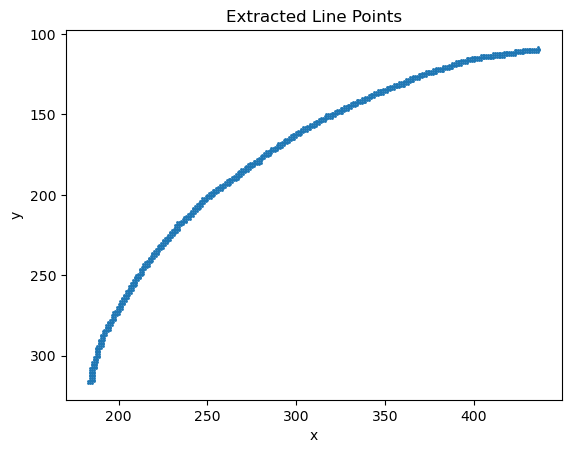

In [7]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt

def extract_line_points(image_path, csv_path='line_points.csv'):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded successfully
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Threshold the image to get a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find the coordinates of the white pixels (the line)
    coordinates = np.column_stack(np.where(binary_image > 0))
    
    # Save the coordinates to a CSV file
    line_no = 0
    segment_no = 0
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        for coord in coordinates:
            writer.writerow([line_no, segment_no, coord[1], coord[0]])  # Adjust order to line no., segment no., x, y
    
    print(f"Line points have been saved to {csv_path}")
    
    return coordinates

# Example usage
image_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\curved_line.png"
csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\curved_line.csv"  # Change this to your desired CSV output path
line_points = extract_line_points(image_path, csv_path)

# Visualize the points
plt.scatter(line_points[:, 1], line_points[:, 0], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Extracted Line Points')
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.show()

### Dataset Generation

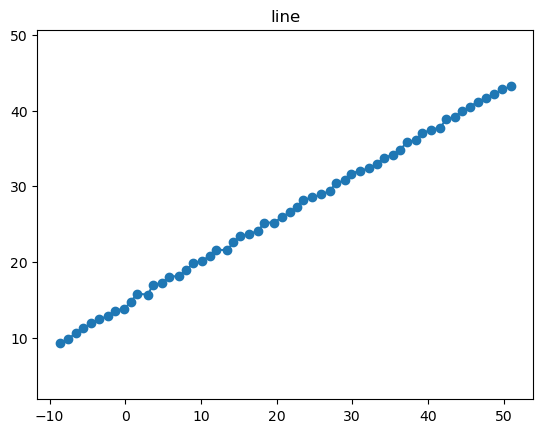

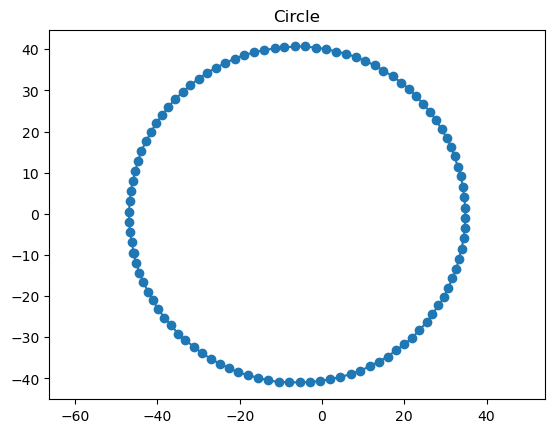

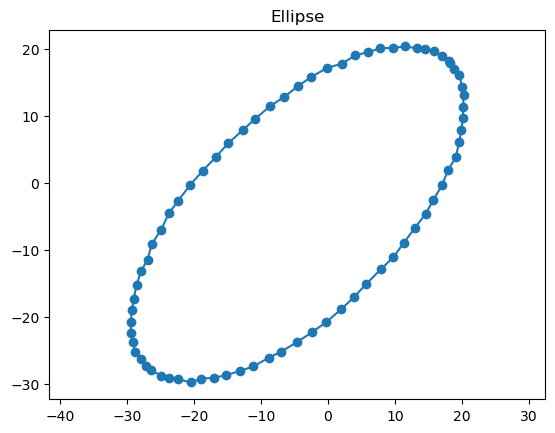

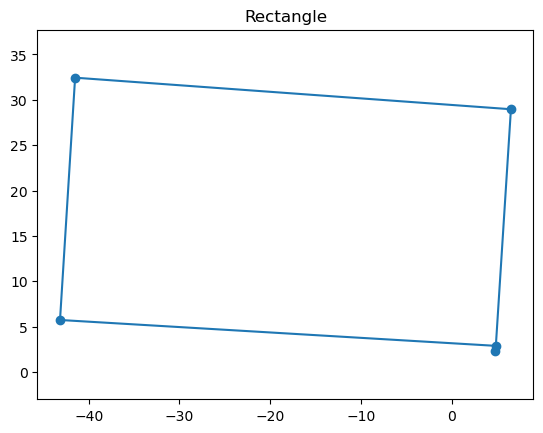

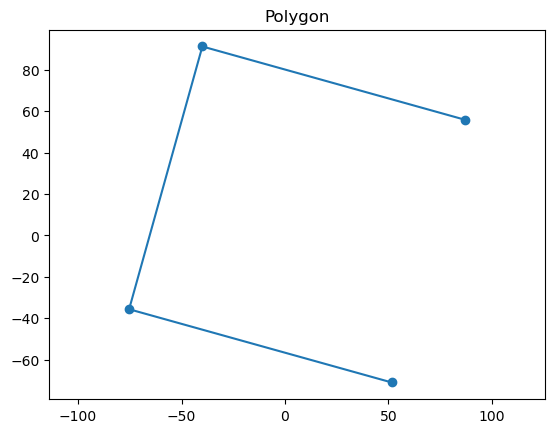

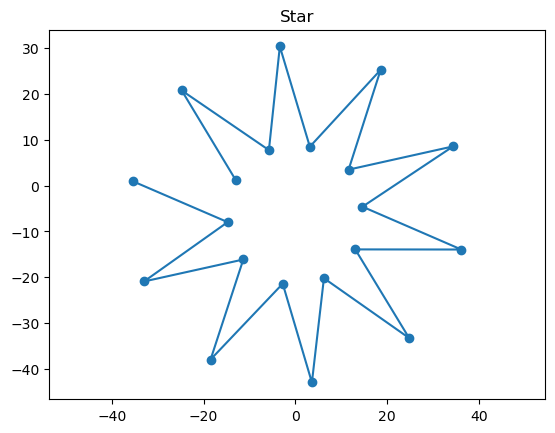

In [3]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Transformation functions
def random_rotation(coords, angle=None):
    if angle is None:
        angle = np.random.uniform(0, 2 * np.pi)
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    return coords @ rotation_matrix.T

def random_translation(coords, max_translation=10):
    translation = np.random.uniform(-max_translation, max_translation, size=(1, 2))
    return coords + translation

def random_scaling(coords, scale_range=(0.5, 1.5)):
    scale = np.random.uniform(*scale_range)
    return coords * scale

def apply_random_transformations(coords):
    coords = random_rotation(coords)
    coords = random_translation(coords)
    coords = random_scaling(coords)
    return coords

# Shape generation functions with random parameters
def generate_straight_line():
    length = np.random.uniform(50, 150)
    noise = np.random.uniform(0, 0.5)
    x = np.linspace(0, length, num=int(length))
    y = np.zeros(int(length))
    y += np.random.normal(0, noise, int(length))
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_circle():
    radius = np.random.uniform(20, 100)
    num_points = np.random.randint(50, 150)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = radius * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_ellipse():
    a = np.random.uniform(20, 100)
    b = np.random.uniform(20, 100)
    num_points = np.random.randint(50, 150)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = a * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = b * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_rectangle():
    width = np.random.uniform(20, 100)
    height = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    x = np.array([0, width, width, 0, 0])
    y = np.array([0, 0, height, height, 0])
    x += np.random.normal(0, noise, x.shape)
    y += np.random.normal(0, noise, y.shape)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_regular_polygon():
    sides = np.random.randint(3, 10)
    radius = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    x = radius * np.cos(angles) + np.random.normal(0, noise, sides)
    y = radius * np.sin(angles) + np.random.normal(0, noise, sides)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_star():
    radius1 = np.random.uniform(20, 100)
    radius2 = np.random.uniform(10, 50)
    num_points = np.random.randint(5, 11) * 2
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    radii = np.array([radius1 if i % 2 == 0 else radius2 for i in range(num_points)])
    x = radii * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = radii * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

# Generate synthetic data
shapes = ['line', 'circle', 'ellipse', 'rectangle', 'polygon', 'star']
data = []

for _ in range(100):  # Generate 100 samples per shape
    for shape in shapes:
        if shape == 'line':
            coords = generate_straight_line()
        elif shape == 'circle':
            coords = generate_circle()
        elif shape == 'ellipse':
            coords = generate_ellipse()
        elif shape == 'rectangle':
            coords = generate_rectangle()
        elif shape == 'polygon':
            coords = generate_regular_polygon()
        elif shape == 'star':
            coords = generate_star()
        
        data.append([shape, coords.tolist()])

# Save to CSV
df = pd.DataFrame(data, columns=['shape', 'coords'])
df.to_csv(r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\synthetic_shapes.csv", index=False)

# Plotting example shapes
def plot_shape(coords, shape_name):
    coords = np.array(coords)
    plt.figure()
    plt.plot(coords[:, 0], coords[:, 1], 'o-')
    plt.title(shape_name)
    plt.axis('equal')
    plt.show()

# Plot examples
plot_shape(generate_straight_line(), 'line')
plot_shape(generate_circle(), 'Circle')
plot_shape(generate_ellipse(), 'Ellipse')
plot_shape(generate_rectangle(), 'Rectangle')
plot_shape(generate_regular_polygon(), 'Polygon')
plot_shape(generate_star(), 'Star')

In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Transformation functions
def random_rotation(coords, angle=None):
    if angle is None:
        angle = np.random.uniform(0, 2 * np.pi)
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    return coords @ rotation_matrix.T

def random_translation(coords, max_translation=10):
    translation = np.random.uniform(-max_translation, max_translation, size=(1, 2))
    return coords + translation

def random_scaling(coords, scale_range=(0.5, 1.5)):
    scale = np.random.uniform(*scale_range)
    return coords * scale

def apply_random_transformations(coords):
    coords = random_rotation(coords)
    coords = random_translation(coords)
    coords = random_scaling(coords)
    return coords

# Shape generation functions with random parameters
def generate_straight_line(num_points=200):
    length = np.random.uniform(50, 150)
    noise = np.random.uniform(0, 0.5)
    x = np.linspace(0, length, num=num_points)
    y = np.zeros(num_points)
    y += np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_circle(num_points=200):
    radius = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = radius * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_ellipse(num_points=200):
    a = np.random.uniform(20, 100)
    b = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = a * np.cos(angles) + np.random.normal(0, noise, num_points)
    y = b * np.sin(angles) + np.random.normal(0, noise, num_points)
    coords = np.vstack((x, y)).T
    return apply_random_transformations(coords)

def generate_rectangle(num_points=200):
    width = np.random.uniform(20, 100)
    height = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    # Generate corners
    corners = np.array([
        [0, 0],
        [width, 0],
        [width, height],
        [0, height],
        [0, 0]
    ])
    coords = []
    for i in range(4):
        edge_points = np.linspace(corners[i], corners[i+1], num_points//4)
        coords.extend(edge_points)
    coords = np.array(coords)
    coords += np.random.normal(0, noise, coords.shape)
    return apply_random_transformations(coords)

def generate_regular_polygon(num_points=200):
    sides = np.random.randint(3, 10)
    radius = np.random.uniform(20, 100)
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    vertices = np.vstack((radius * np.cos(angles), radius * np.sin(angles))).T
    vertices = np.vstack((vertices, vertices[0]))  # Close the polygon
    coords = []
    for i in range(sides):
        edge_points = np.linspace(vertices[i], vertices[i+1], num_points//sides)
        coords.extend(edge_points)
    coords = np.array(coords)
    coords += np.random.normal(0, noise, coords.shape)
    return apply_random_transformations(coords)

def generate_star(num_points=200):
    radius1 = np.random.uniform(25, 100)
    radius2 = np.random.uniform(10, radius1 - 10)
    num_vertices = np.random.randint(5, 11) * 2
    noise = np.random.uniform(0, 0.5)
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    radii = np.array([radius1 if i % 2 == 0 else radius2 for i in range(num_vertices)])
    vertices = np.vstack((radii * np.cos(angles), radii * np.sin(angles))).T

    coords = []
    points_per_edge = num_points // num_vertices
    for i in range(num_vertices):
        edge_points = np.linspace(vertices[i], vertices[(i + 1) % num_vertices], points_per_edge, endpoint=False)
        coords.extend(edge_points)
    coords = np.array(coords)

    # Add remaining points to ensure total num_points
    remaining_points = num_points - len(coords)
    if remaining_points > 0:
        extra_points = np.linspace(vertices[-1], vertices[0], remaining_points + 1, endpoint=False)[1:]
        coords = np.vstack((coords, extra_points))

    coords += np.random.normal(0, noise, coords.shape)
    return apply_random_transformations(coords)

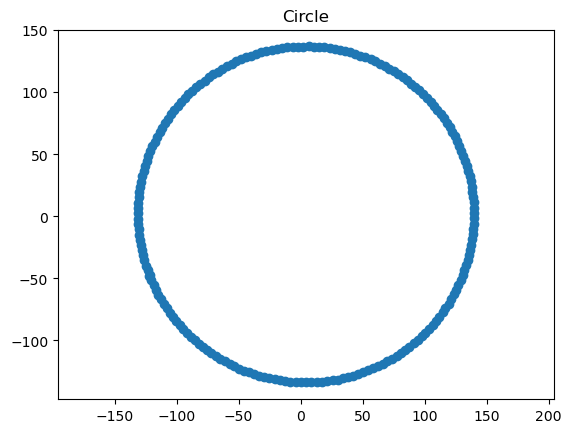

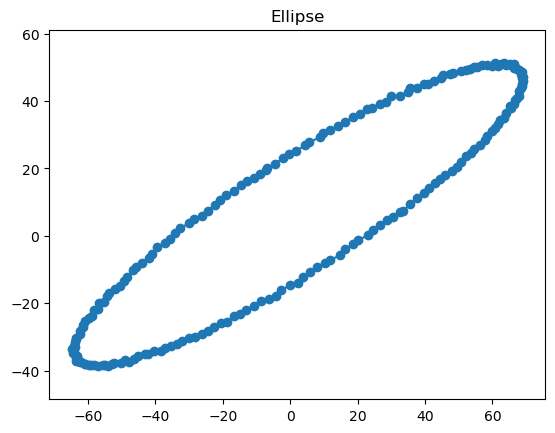

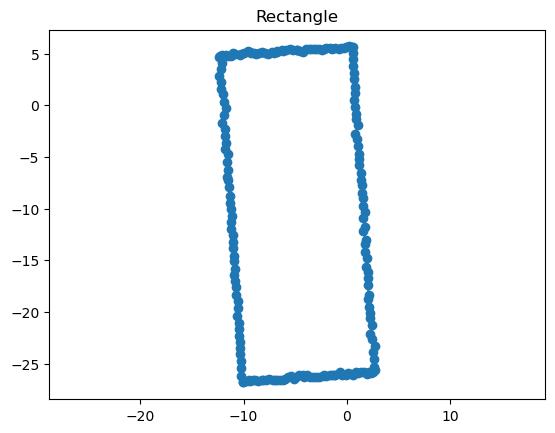

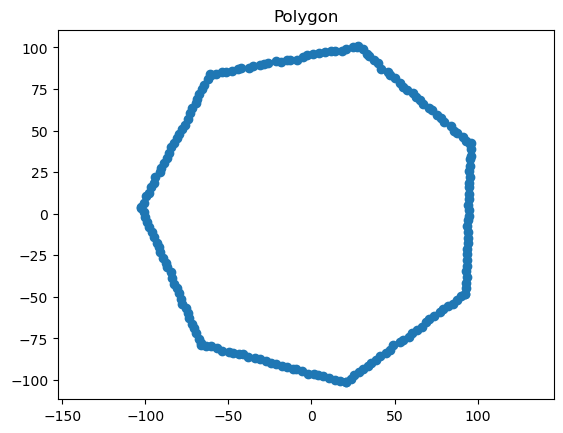

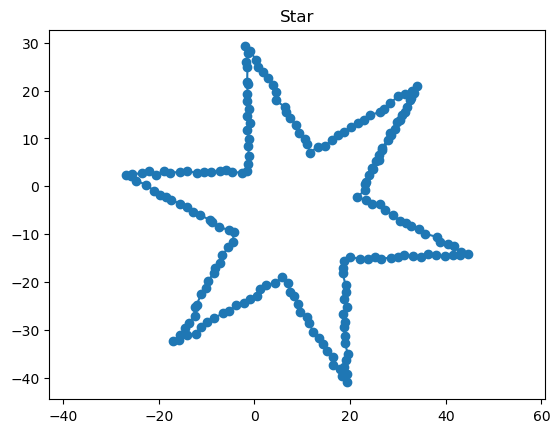

In [15]:
# Generate synthetic data
# shapes = ['line', 'circle', 'ellipse', 'rectangle', 'polygon', 'star']
shapes = ['circle', 'ellipse', 'rectangle', 'polygon', 'star']
data = []

for _ in range(10000):  # Generate 100 samples per shape
    for shape in shapes:
        # if shape == 'line':
        #     coords = generate_straight_line()
        if shape == 'circle':
            coords = generate_circle()
        elif shape == 'ellipse':
            coords = generate_ellipse()
        elif shape == 'rectangle':
            coords = generate_rectangle()
        elif shape == 'polygon':
            coords = generate_regular_polygon()
        elif shape == 'star':
            coords = generate_star()
        
        data.append([shape, coords.tolist()])

# Save to CSV
df = pd.DataFrame(data, columns=['shape', 'coords'])
df.to_csv(r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\synthetic_shapes2.csv", index=False)

# Plotting example shapes
def plot_shape(coords, shape_name):
    coords = np.array(coords)
    plt.figure()
    plt.plot(coords[:, 0], coords[:, 1], 'o-')
    plt.title(shape_name)
    plt.axis('equal')
    plt.show()

# Plot examples
# plot_shape(generate_straight_line(), 'line')
plot_shape(generate_circle(), 'Circle')
plot_shape(generate_ellipse(), 'Ellipse')
plot_shape(generate_rectangle(), 'Rectangle')
plot_shape(generate_regular_polygon(), 'Polygon')
plot_shape(generate_star(), 'Star')

### ML Classification Models testing

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [17]:
# Load the synthetic data
shapes_csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\synthetic_shapes2.csv"
df = pd.read_csv(shapes_csv_path)
df['coords'] = df['coords'].apply(eval)  # Convert string representation of list back to list

# Prepare the dataset
X = np.array(df['coords'].tolist())
y = df['shape'].values

# Flatten the coordinates for each shape into a single feature vector
# X = X.reshape((X.shape[0], -1))

# Ensure all arrays have the same length
max_length = max(len(arr) for arr in X)
X_padded = np.array([np.pad(arr, ((0, max_length - len(arr)), (0, 0)), mode='constant').flatten() for arr in X])

C:\Users\suyash\AppData\Local\Temp\ipykernel_52920\3056341165.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(df['coords'].tolist())


In [18]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the models
def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

In [19]:
# Random Forest
import joblib

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
model_name = "Random Forest"
# train_evaluate_model(rf_model, "Random Forest")

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"Classification Report for {model_name}:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Confusion Matrix for {model_name}:\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

# Save the model to a file
model_path = r'C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\Models\random_forest_model2.joblib'
joblib.dump(rf_model, model_path)

# Save the scaler to a file
scaler_path = r'C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\Models\scaler2.joblib'
joblib.dump(scaler, scaler_path)

# Save the label encoder to a file
label_encoder_path = r'C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\Models\label_encoder2.joblib'
joblib.dump(label_encoder, label_encoder_path)

Classification Report for Random Forest:

              precision    recall  f1-score   support

      circle       0.65      0.92      0.76      2019
     ellipse       0.91      0.74      0.82      2043
     polygon       0.94      0.74      0.83      1934
   rectangle       1.00      1.00      1.00      1975
        star       0.96      0.93      0.95      2029

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.87     10000

Confusion Matrix for Random Forest:

[[1864  116   35    2    2]
 [ 515 1518    8    0    2]
 [ 403   17 1437    4   73]
 [   2    0    0 1973    0]
 [  83   10   45    2 1889]]




['C:\\Users\\suyash\\OneDrive - iiit-b\\Projects\\Adobe_GenSolve\\Models\\label_encoder2.joblib']

In [20]:
# Function to load and use the stored model for prediction
def predict_new_data(X_new, model_path, scaler_path, label_encoder_path):
    """
    Predict the class labels for new data using a stored model.

    Parameters:
    - X_new: New data to predict (list of coordinate lists)
    - model_path: Path to the stored model file
    - scaler_path: Path to the stored scaler file
    - label_encoder_path: Path to the stored label encoder file

    Returns:
    - predictions: Predicted class labels
    """
    # Load the stored model, scaler, and label encoder
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    label_encoder = joblib.load(label_encoder_path)

    # Convert new data to numpy array and flatten
    X_new = np.array(X_new, dtype=object)
    max_length = max(len(arr) for arr in X_new)
    X_new_padded = np.array([np.pad(arr, ((0, max_length - len(arr)), (0, 0)), mode='constant').flatten() for arr in X_new])

    # Standardize new data
    X_new_padded = scaler.transform(X_new_padded)

    # Make predictions
    y_pred = model.predict(X_new_padded)
    predictions = label_encoder.inverse_transform(y_pred)

    return predictions

In [22]:
# Example usage of the prediction function with new data
X_new = [
    generate_star().tolist(),  # Example new star shape
    generate_circle().tolist(),  # Example new circle shape
]

predictions = predict_new_data(X_new, model_path, scaler_path, label_encoder_path)
print(f"Predictions: {predictions}")

Predictions: ['star' 'circle']


In [19]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_evaluate_model(dt_model, "Decision Tree")

Classification Report for Decision Tree:

              precision    recall  f1-score   support

      circle       0.60      0.63      0.62      1936
     ellipse       0.68      0.69      0.68      2000
        line       1.00      1.00      1.00      2014
     polygon       0.73      0.75      0.74      1963
   rectangle       0.99      0.98      0.99      2051
        star       0.87      0.81      0.84      2036

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000

Confusion Matrix for Decision Tree:

[[1220  427    1  218    6   64]
 [ 459 1373    0  117   10   41]
 [   0    0 2013    0    0    1]
 [ 227  119    0 1479    4  134]
 [   8   10    3    6 2018    6]
 [ 103   84    4  199    2 1644]]




In [20]:
# # SVM
# svm_model = SVC(kernel='linear', random_state=42)
# train_evaluate_model(svm_model, "SVM")

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
train_evaluate_model(nb_model, "Naive Bayes")

In [ ]:
# Neural Network
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model.fit(X_train, y_onehot[train_test_split(range(len(y_onehot)), test_size=0.2, random_state=42)[0]], epochs=50, batch_size=10, verbose=1)

y_pred_nn = np.argmax(nn_model.predict(X_test), axis=1)
print(f"Classification Report for Neural Network:\n")
print(classification_report(y_test, y_pred_nn, target_names=label_encoder.classes_))
print(f"Confusion Matrix for Neural Network:\n")
print(confusion_matrix(y_test, y_pred_nn))

In [ ]:
import numpy as np
import cv2
from scipy.spatial import ConvexHull
from skimage.measure import moments_hu, moments_central, perimeter

def extract_features(points):
    x, y = zip(*points)
    x = np.array(x)
    y = np.array(y)
    
    # Compute centroid
    centroid_x = np.mean(x)
    centroid_y = np.mean(y)
    
    # Compute area using the shoelace formula
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    
    # Compute perimeter
    perim = perimeter(np.array(points))
    
    # Compute bounding box
    min_x, max_x = np.min(x), np.max(x)
    min_y, max_y = np.min(y), np.max(y)
    bounding_box_width = max_x - min_x
    bounding_box_height = max_y - min_y
    aspect_ratio = bounding_box_width / bounding_box_height
    
    # Compute Hu moments
    moments = cv2.moments(np.array(points).reshape(-1, 1, 2))
    hu_moments = moments_hu(moments)
    
    # Compute convex hull
    hull = ConvexHull(points)
    convex_hull_area = hull.volume
    convex_hull_perimeter = hull.area
    
    # Compute compactness
    compactness = area / (perim ** 2)
    
    # Compute eccentricity (placeholder example for ellipses)
    # For general shapes, more complex methods are required
    if len(points) > 4:
        ellipse = cv2.fitEllipse(np.array(points).reshape(-1, 1, 2))
        (center, axes, orientation) = ellipse
        major_axis = max(axes)
        minor_axis = min(axes)
        eccentricity = np.sqrt(1 - (minor_axis / major_axis) ** 2)
    else:
        eccentricity = 0  # For shapes that can't fit an ellipse
    
    features = {
        'centroid_x': centroid_x,
        'centroid_y': centroid_y,
        'area': area,
        'perimeter': perim,
        'bounding_box_width': bounding_box_width,
        'bounding_box_height': bounding_box_height,
        'aspect_ratio': aspect_ratio,
        'hu_moments': hu_moments,
        'convex_hull_area': convex_hull_area,
        'convex_hull_perimeter': convex_hull_perimeter,
        'compactness': compactness,
        'eccentricity': eccentricity
    }
    
    return features

# Example usage
points = [(0, 0), (1, 1.2), (2, 0.8), (3, 1.1), (4, 0.9), (5, 1.3), (6, 1.0)]
features = extract_features(points)
for key, value in features.items():
    print(f"{key}: {value}")